In [2]:
import os
from dotenv import load_dotenv
import pandas as pd
import mysql.connector


# .env 파일 로드
load_dotenv()

# 환경 변수 읽기
DB_HOST = os.getenv("DB_HOST")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")
DB_SUER = os.getenv("DB_USER")

In [3]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
SELECT * FROM michelin.naver_trend_day
WHERE report_date BETWEEN '2019-01-01' AND '2024-12-31';
"""
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()

df['report_date'] = pd.to_datetime(df['report_date'])  # 날짜 형식 변환
df['report_date'] = df['report_date'].dt.to_period('M')  # 년-월 추출


numeric_columns = df.select_dtypes(include=['number']).columns

ndf = df.groupby('report_date')[numeric_columns].sum()

print(ndf)

              allergy  shingles     hfmd  gastroenteritis  food_poisoning  \
report_date                                                                 
2019-01      16.79129  41.78634  0.00454        1647.5514       420.36460   
2019-02      15.08235  37.71574  0.00000        1330.2296       365.54810   
2019-03      19.86239  39.49674  0.00000        1121.5436       339.53027   
2019-04      24.24455  45.99936  0.10326        1253.5569       368.27894   
2019-05      30.52976  56.64972  0.33187        1403.0028       482.48670   
...               ...       ...      ...              ...             ...   
2024-01      23.99086  35.01126  0.39657        1804.9276       605.91470   
2024-02      23.08673  35.35467  0.33471        1452.1865       476.62210   
2024-03      30.44636  40.52122  0.53113        1219.0545       396.78570   
2024-04      40.21303  40.73802  0.95053        1182.1843       401.68270   
2024-05      31.85162  46.47895  2.07770        1240.7193       486.05360   

/tmp/ipykernel_21528/1884085967.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [11]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
SELECT category, DATE_FORMAT(report_date, '%Y-%m') as report_date, patient_count FROM michelin.disease_age where age_group_10 = "계"
"""
pdf = pd.read_sql(query, conn)
# 연결 종료
conn.close()

/tmp/ipykernel_21528/778550300.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pdf = pd.read_sql(query, conn)


In [12]:
pdf.head()

,category,report_date,patient_count
0,수족구병,2021-03,1082
1,수족구병,2021-04,1080
2,수족구병,2021-05,1343
3,수족구병,2021-06,1869
4,수족구병,2021-07,2256


In [13]:
ndf.head()

,report_date,allergy,shingles,hfmd,gastroenteritis,food_poisoning,cold,flu,cold_injury
0,2019-01,16.79129,41.78634,0.00454,1647.5514,420.36460,134.32195,210.64463,91.24841
1,2019-02,15.08235,37.71574,0.00000,1330.2296,365.54810,71.28946,36.02595,42.88931
2,2019-03,19.86239,39.49674,0.00000,1121.5436,339.53027,84.88467,29.01530,8.56197
3,2019-04,24.24455,45.99936,0.10326,1253.5569,368.27894,118.91226,28.12652,5.85347
4,2019-05,30.52976,56.64972,0.33187,1403.0028,482.48670,75.36010,10.61832,2.97656


In [10]:
ndf = ndf.reset_index()
ndf


,report_date,allergy,shingles,hfmd,gastroenteritis,food_poisoning,cold,flu,cold_injury
0,2019-01,16.79129,41.78634,0.00454,1647.5514,420.36460,134.32195,210.64463,91.24841
1,2019-02,15.08235,37.71574,0.00000,1330.2296,365.54810,71.28946,36.02595,42.88931
2,2019-03,19.86239,39.49674,0.00000,1121.5436,339.53027,84.88467,29.01530,8.56197
3,2019-04,24.24455,45.99936,0.10326,1253.5569,368.27894,118.91226,28.12652,5.85347
4,2019-05,30.52976,56.64972,0.33187,1403.0028,482.48670,75.36010,10.61832,2.97656
...,...,...,...,...,...,...,...,...,...
60,2024-01,23.99086,35.01126,0.39657,1804.9276,605.91470,221.45240,12.92716,61.36514
61,2024-02,23.08673,35.35467,0.33471,1452.1865,476.62210,130.07771,8.08864,22.28868
62,2024-03,30.44636,40.52122,0.53113,1219.0545,396.78570,133.44891,9.87680,15.29382
63,2024-04,40.21303,40.73802,0.95053,1182.1843,401.68270,115.11503,4.58594,4.43342


In [24]:
# pdf

df_pivot = pdf.pivot_table(index=['report_date'], columns='category', values='patient_count', fill_value=0).reset_index()

print(df_pivot)

category report_date         감기     대상포진     수족구병  식중독 관련 감염병  알레르기성결막염  \
0            2019-01  3363738.0  74336.0   3951.0    624715.0  173924.0   
1            2019-02  2614063.0  67787.0   3144.0    510723.0  157176.0   
2            2019-03  3338647.0  73461.0   4921.0    501592.0  202007.0   
3            2019-04  3897000.0  77911.0  13254.0    534878.0  281019.0   
4            2019-05  3357906.0  81580.0  42527.0    569154.0  334643.0   
..               ...        ...      ...      ...         ...       ...   
60           2024-01  3925329.0  74870.0   3376.0    710645.0  158421.0   
61           2024-02  3072184.0  71445.0   2841.0    578901.0  152381.0   
62           2024-03  3518256.0  73881.0   3595.0    542186.0  181293.0   
63           2024-04  3450479.0  79560.0  10516.0    535501.0  345196.0   
64           2024-05  3137010.0  83113.0  34315.0    547700.0  252100.0   

category     알레르기질환    온열질환     인플루엔자        장염        폐렴   한랭질환    호흡계통의 질환  
0         2251078.0 

In [31]:
# df_pivot['report_date'] = pd.to_datetime(df_pivot['report_date']).dt.to_period('M')

merged_df = pd.merge(ndf, df_pivot, left_on='report_date', right_on='report_date', how='inner')
merged_df = merged_df.drop(columns=['report_date'])

# 결측값 제거
merged_df = merged_df.dropna()

# 확인
print(merged_df.head())

    allergy  shingles     hfmd  gastroenteritis  food_poisoning       cold  \
0  16.79129  41.78634  0.00454        1647.5514       420.36460  134.32195   
1  15.08235  37.71574  0.00000        1330.2296       365.54810   71.28946   
2  19.86239  39.49674  0.00000        1121.5436       339.53027   84.88467   
3  24.24455  45.99936  0.10326        1253.5569       368.27894  118.91226   
4  30.52976  56.64972  0.33187        1403.0028       482.48670   75.36010   

         flu  cold_injury         감기     대상포진     수족구병  식중독 관련 감염병  알레르기성결막염  \
0  210.64463     91.24841  3363738.0  74336.0   3951.0    624715.0  173924.0   
1   36.02595     42.88931  2614063.0  67787.0   3144.0    510723.0  157176.0   
2   29.01530      8.56197  3338647.0  73461.0   4921.0    501592.0  202007.0   
3   28.12652      5.85347  3897000.0  77911.0  13254.0    534878.0  281019.0   
4   10.61832      2.97656  3357906.0  81580.0  42527.0    569154.0  334643.0   

      알레르기질환    온열질환     인플루엔자        장염        폐렴

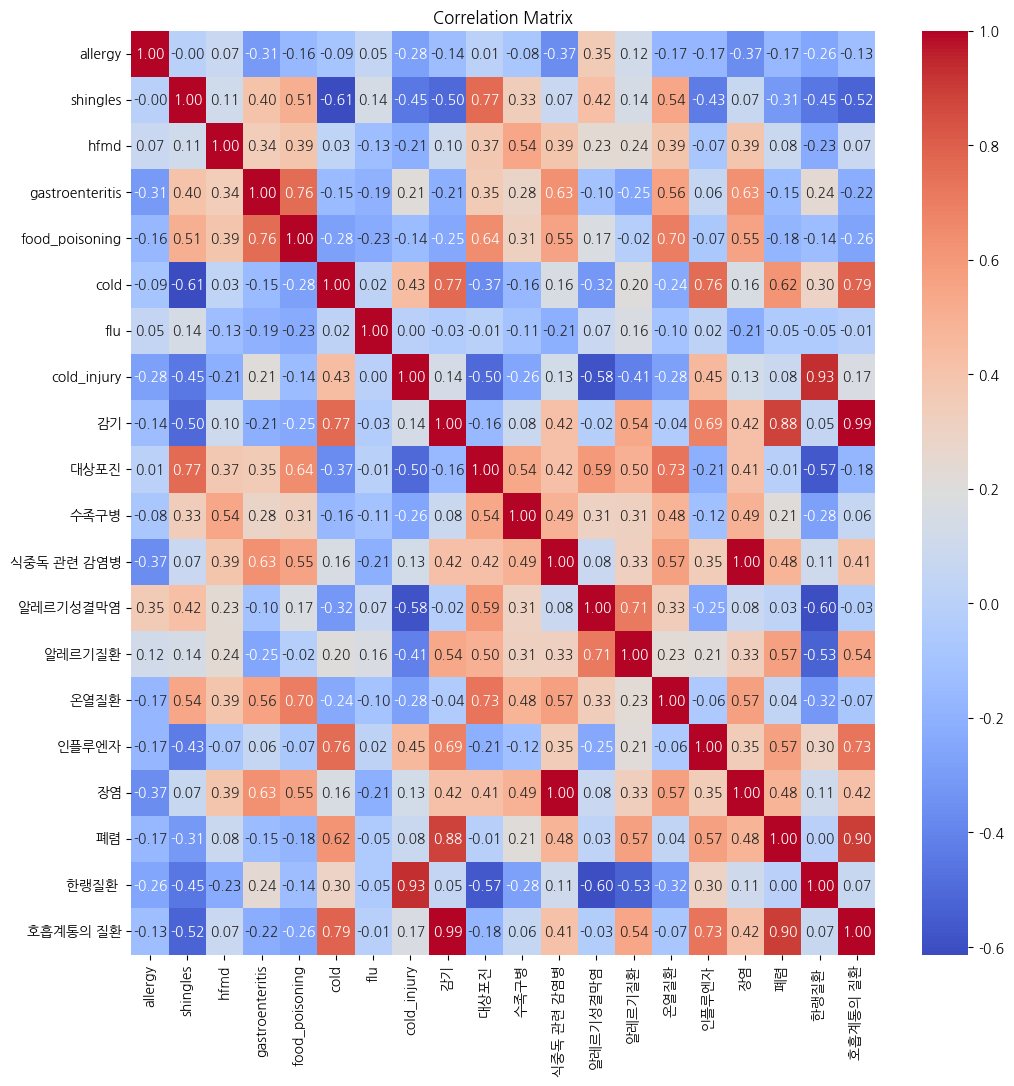

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 결측값 제거
merged_df = merged_df.dropna()

# 확인
# print(merged_df.head())

# 상관 행렬 계산
correlation_matrix = merged_df.corr()

# 상관 행렬 출력
# print(correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [212]:
# 열 이름 확인
print(year_monthly_average.columns)  # ['index', 'value1']
print(df.columns)  # ['index', 'value2']

# 병합
merged_df = pd.merge(year_monthly_average, df, on='index', how='inner')

# 결과 확인
print(merged_df)

Index(['gastroenteritis'], dtype='object')
Index(['patient_count'], dtype='object')


KeyError: 'index'

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 2019-01 to 2024-05
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_count  65 non-null     float64
dtypes: float64(1)
memory usage: 1.0+ KB


In [180]:
# 인덱스를 열로 변환
year_monthly_average.reset_index(inplace=True)
df.reset_index(inplace=True)

# 열 이름 확인
print(year_monthly_average.columns)  # ['index', 'value1']
print(df.columns)  # ['index', 'value2']

# 병합
merged_df = pd.merge(year_monthly_average, df, on='index', how='inner')

# 결과 확인
print(merged_df)

Index(['year_month', 'allergy', 'shingles', 'hfmd', 'gastroenteritis',
       'food_poisoning', 'cold', 'flu', 'cold_injury'],
      dtype='object')
Index(['report_date', 'patient_count'], dtype='object')


KeyError: 'index'